In [1]:
__imp

Libraries have been loaded


## Load Additional Libraries

In [2]:
basepath = os.path.expanduser('../')

## Load Data

In [3]:
%%time

app_train = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_train.pkl'))
# app_test  = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/application_test.pkl'))

# bureau       = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/bureau.pkl'))
prev_app     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/previous_application.pkl'))
# installments = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/installments_payments.pkl')) 
pos_cash     = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/POS_CASH_balance.pkl'))
# credit_bal  = pd.read_pickle(os.path.join(basepath, 'data/interim/dataset1/credit_card_balance.pkl'))

CPU times: user 149 ms, sys: 429 ms, total: 578 ms
Wall time: 3.97 s


### Light GBM Feature Importance

In [6]:
feat_imp = pd.read_csv('../data/interim/dataset1/feat_df_v35_model.txt_F0.csv')

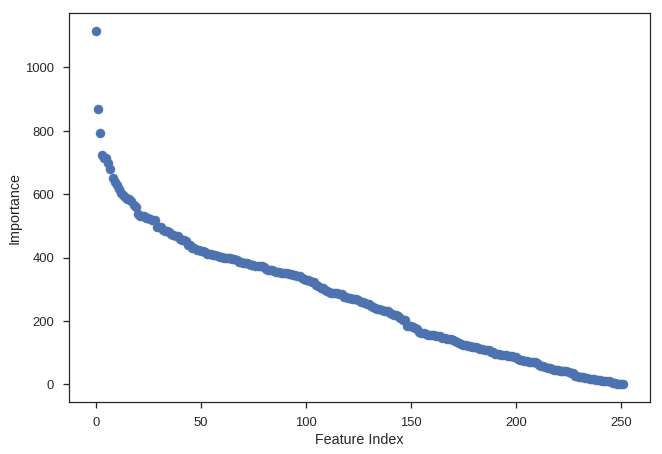

In [7]:
plt.scatter(np.arange(0, len(feat_imp)), feat_imp.imp)
plt.xlabel('Feature Index')
plt.ylabel('Importance');

In [4]:
installments

,SK_ID_PREV,SK_ID_CURR,NUM_INSTALMENT_VERSION,NUM_INSTALMENT_NUMBER,DAYS_INSTALMENT,DAYS_ENTRY_PAYMENT,AMT_INSTALMENT,AMT_PAYMENT
0,1054186,161674,1.0,6,-1180.0,-1187.0,6948.359863,6948.359863
1,1330831,151639,0.0,34,-2156.0,-2156.0,1716.525024,1716.525024
2,2085231,193053,2.0,1,-63.0,-63.0,25425.000000,25425.000000
3,2452527,199697,1.0,3,-2418.0,-2426.0,24350.130859,24350.130859
4,2714724,167756,1.0,2,-1383.0,-1366.0,2165.040039,2160.584961
5,1137312,164489,1.0,12,-1384.0,-1417.0,5970.375000,5970.375000
6,2234264,184693,4.0,11,-349.0,-352.0,29432.294922,29432.294922
7,1818599,111420,2.0,4,-968.0,-994.0,17862.164062,17862.164062
8,2723183,112102,0.0,14,-197.0,-197.0,70.739998,70.739998
9,1413990,109741,1.0,4,-570.0,-609.0,14308.469727,14308.469727


** Type of loan **

- Revolving loan: Arrangement which allows for the loan amount to be withdrawn, repaid, and redrawn again in any manner and any number of times, until the arrangement expires. Credit card loans and overdrafts are revolving loans. Also called evergreen loan.

In [10]:
app_train.NAME_CONTRACT_TYPE.value_counts()

Cash loans         278232
Revolving loans     29279
Name: NAME_CONTRACT_TYPE, dtype: int64

In [15]:
# relationship with target
ss = pd.crosstab(app_train.NAME_CONTRACT_TYPE, app_train.TARGET)
ss.loc[:, 'default_ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET                 0.0    1.0  default_ratio
NAME_CONTRACT_TYPE                              
Cash loans          255011  23221       0.083459
Revolving loans      27675   1604       0.054783


** Social Information about client **

In [17]:
# does client own a car or house
app_train.FLAG_OWN_CAR.value_counts(dropna=False)

N    202924
Y    104587
Name: FLAG_OWN_CAR, dtype: int64

In [18]:
# relationship with target variable
ss = pd.crosstab(app_train.FLAG_OWN_CAR, app_train.TARGET)
ss.loc[:, 'default_ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET           0.0    1.0  default_ratio
FLAG_OWN_CAR                              
N             185675  17249       0.085002
Y              97011   7576       0.072437


In [19]:
app_train.FLAG_OWN_REALTY.value_counts(dropna=False)

Y    213312
N     94199
Name: FLAG_OWN_REALTY, dtype: int64

In [20]:
# relationship with target variable
ss = pd.crosstab(app_train.FLAG_OWN_REALTY, app_train.TARGET)
ss.loc[:, 'default_ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET              0.0    1.0  default_ratio
FLAG_OWN_REALTY                              
N                 86357   7842       0.083249
Y                196329  16983       0.079616


In [21]:
# combination of car and realty
ss = pd.crosstab(app_train.FLAG_OWN_CAR.astype(np.str) + '_' +\
                 app_train.FLAG_OWN_REALTY.astype(np.str),
                 app_train.TARGET
                )

ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET     0.0    1.0     ratio
row_0                          
N_N      56400   5572  0.089912
N_Y     129275  11677  0.082844
Y_N      29957   2270  0.070438
Y_Y      67054   5306  0.073328


In [29]:
# income status of client
app_train.NAME_INCOME_TYPE.value_counts(dropna=False)

Working                 158774
Commercial associate     71617
Pensioner                55362
State servant            21703
Unemployed                  22
Student                     18
Businessman                 10
Maternity leave              5
Name: NAME_INCOME_TYPE, dtype: int64

In [31]:
# relationship with target
ss = pd.crosstab(app_train.NAME_INCOME_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET                   0.0    1.0     ratio
NAME_INCOME_TYPE                             
Businessman               10      0  0.000000
Commercial associate   66257   5360  0.074843
Maternity leave            3      2  0.400000
Pensioner              52380   2982  0.053864
State servant          20454   1249  0.057550
Student                   18      0  0.000000
Unemployed                14      8  0.363636
Working               143550  15224  0.095885


In [32]:
# education status of client
app_train.NAME_EDUCATION_TYPE.value_counts(dropna=False)

Secondary / secondary special    218391
Higher education                  74863
Incomplete higher                 10277
Lower secondary                    3816
Academic degree                     164
Name: NAME_EDUCATION_TYPE, dtype: int64

In [33]:
# relationship with target
ss = pd.crosstab(app_train.NAME_EDUCATION_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET                            0.0    1.0     ratio
NAME_EDUCATION_TYPE                                   
Academic degree                   161      3  0.018293
Higher education                70854   4009  0.053551
Incomplete higher                9405    872  0.084850
Lower secondary                  3399    417  0.109277
Secondary / secondary special  198867  19524  0.089399


In [34]:
# combination of education and income
ss = pd.crosstab(app_train.NAME_EDUCATION_TYPE.astype(np.str) + '_' +\
                 app_train.NAME_INCOME_TYPE.astype(np.str), 
                 app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET                                                 0.0    1.0     ratio
row_0                                                                      
Academic degree_Commercial associate                    42      1  0.023256
Academic degree_Pensioner                               26      0  0.000000
Academic degree_State servant                           23      0  0.000000
Academic degree_Working                                 70      2  0.027778
Higher education_Businessman                            10      0  0.000000
Higher education_Commercial associate                22782   1243  0.051738
Higher education_Maternity leave                         3      0  0.000000
Higher education_Pensioner                            7848    340  0.041524
Higher education_State servant                        8519    344  0.038813
Higher education_Student                                 6      0  0.000000
Higher education_Unemployed                              6      0  0.000000
Higher educa

In [35]:
# family status
app_train.NAME_FAMILY_STATUS.value_counts(dropna=False)

Married                 196432
Single / not married     45444
Civil marriage           29775
Separated                19770
Widow                    16088
Unknown                      2
Name: NAME_FAMILY_STATUS, dtype: int64

In [36]:
# relationship with target
ss = pd.crosstab(app_train.NAME_FAMILY_STATUS, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

del ss
gc.collect();

TARGET                   0.0    1.0     ratio
NAME_FAMILY_STATUS                           
Civil marriage         26814   2961  0.099446
Married               181582  14850  0.075599
Separated              18150   1620  0.081942
Single / not married   40987   4457  0.098077
Unknown                    2      0  0.000000
Widow                  15151    937  0.058242


In [38]:
# house status
app_train.NAME_HOUSING_TYPE.value_counts(dropna=False)

House / apartment      272868
With parents            14840
Municipal apartment     11183
Rented apartment         4881
Office apartment         2617
Co-op apartment          1122
Name: NAME_HOUSING_TYPE, dtype: int64

In [39]:
# relationship with target
ss = pd.crosstab(app_train.NAME_HOUSING_TYPE, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

del ss
gc.collect();

TARGET                  0.0    1.0     ratio
NAME_HOUSING_TYPE                           
Co-op apartment        1033     89  0.079323
House / apartment    251596  21272  0.077957
Municipal apartment   10228    955  0.085397
Office apartment       2445    172  0.065724
Rented apartment       4280    601  0.123131
With parents          13104   1736  0.116981


In [40]:
# combination of family and housing
ss = pd.crosstab(app_train.NAME_FAMILY_STATUS.astype(np.str) + '_' +\
                 app_train.NAME_HOUSING_TYPE.astype(np.str), 
                 app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET                                       0.0    1.0     ratio
row_0                                                            
Civil marriage_Co-op apartment                70      5  0.066667
Civil marriage_House / apartment           23549   2509  0.096285
Civil marriage_Municipal apartment          1056    122  0.103565
Civil marriage_Office apartment              205     22  0.096916
Civil marriage_Rented apartment              532     84  0.136364
Civil marriage_With parents                 1402    219  0.135102
Married_Co-op apartment                      636     42  0.061947
Married_House / apartment                 165170  13122  0.073598
Married_Municipal apartment                 5873    513  0.080332
Married_Office apartment                    1621    107  0.061921
Married_Rented apartment                    2292    301  0.116082
Married_With parents                        5990    765  0.113249
Separated_Co-op apartment                     56     10  0.151515
Separated_

In [41]:
# combination of family, housing, education and income
ss = pd.crosstab(app_train.NAME_FAMILY_STATUS.astype(np.str) + '_' +\
                 app_train.NAME_HOUSING_TYPE.astype(np.str) + '_' +\
                 app_train.NAME_EDUCATION_TYPE.astype(np.str) + '_' +\
                 app_train.NAME_INCOME_TYPE.astype(np.str), 
                 app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET                                               0.0  1.0     ratio
row_0                                                                  
Civil marriage_Co-op apartment_Higher education...    10    1  0.090909
Civil marriage_Co-op apartment_Higher education...     1    0  0.000000
Civil marriage_Co-op apartment_Higher education...     1    0  0.000000
Civil marriage_Co-op apartment_Higher education...     6    2  0.250000
Civil marriage_Co-op apartment_Incomplete highe...     1    0  0.000000
Civil marriage_Co-op apartment_Incomplete highe...     1    0  0.000000
Civil marriage_Co-op apartment_Lower secondary_...     1    0  0.000000
Civil marriage_Co-op apartment_Lower secondary_...     1    0  0.000000
Civil marriage_Co-op apartment_Secondary / seco...     6    1  0.142857
Civil marriage_Co-op apartment_Secondary / seco...     3    0  0.000000
Civil marriage_Co-op apartment_Secondary / seco...     4    0  0.000000
Civil marriage_Co-op apartment_Secondary / seco...    35    1  0

** What kind of information was provided by clients ? **

In [56]:
%%time

res = app_train.loc[:, [f'FLAG_DOCUMENT_{i}' for i in range(2, 22)]]\
               .apply(lambda x: ''.join(x.astype(np.str)), axis=1)

CPU times: user 38 s, sys: 349 ms, total: 38.4 s
Wall time: 38.5 s


In [57]:
ss = pd.crosstab(res, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET                   0.0    1.0     ratio
row_0                                        
00000000000000000000   27917   1632  0.055230
00000000000000000001      79      7  0.081395
00000000000000001000     307      8  0.025397
00000000000010000000      17      0  0.000000
00000000000010000001       1      0  0.000000
00000000010000000000    1081     70  0.060817
00000000100000000000       7      0  0.000000
00000001000000000000    1069     72  0.063103
00000001000000001000      13      0  0.000000
00000001000000010000       3      0  0.000000
00000001000000100000      26      2  0.071429
00000001000001000000       3      0  0.000000
00000001000010000000       5      0  0.000000
00000001000100000000       5      0  0.000000
00000010000000000000   21804   1784  0.075632
00000010000000000001       1      0  0.000000
00000010000000000100      15      0  0.000000
00000010000000001000     249      7  0.027344
00000010000000001001       1      1  0.500000
00000010000000001010       4      

In [9]:
%%time 

# discrepancy in information provided regarding living area
df = app_train.loc[:, ['REG_REGION_NOT_LIVE_REGION',
                       'REG_REGION_NOT_WORK_REGION',
                       'LIVE_REGION_NOT_WORK_REGION',
                       'REG_CITY_NOT_LIVE_CITY',
                       'REG_CITY_NOT_WORK_CITY',
                       'LIVE_CITY_NOT_WORK_CITY'
                      ]]

res = df.apply(np.sum, axis = 1)

CPU times: user 34.2 s, sys: 83.8 ms, total: 34.3 s
Wall time: 34.2 s


In [12]:
ss = pd.crosstab(res, app_train.TARGET)
ss.loc[:, 'ratio']  = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET     0.0    1.0     ratio
row_0                          
0       211676  16678  0.073036
1         1265    120  0.086643
2        57484   6593  0.102892
3         2589    364  0.123264
4         8603    941  0.098596
5          772     97  0.111623
6          297     32  0.097264


In [18]:
%%time

# normalized information about building where client lives
res = app_train.loc[:, [
                'APARTMENTS_AVG',
                'BASEMENTAREA_AVG',
                'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BUILD_AVG',
                'COMMONAREA_AVG',
                'ELEVATORS_AVG',
                'ENTRANCES_AVG',
                'FLOORSMAX_AVG',
                'FLOORSMIN_AVG',
                'LANDAREA_AVG',
                'LIVINGAPARTMENTS_AVG',
                'LIVINGAREA_AVG',
                'NONLIVINGAPARTMENTS_AVG',
                'NONLIVINGAREA_AVG'
                ]].apply(lambda x: np.sum(pd.isnull(x)), axis=1)

CPU times: user 53.5 s, sys: 208 ms, total: 53.7 s
Wall time: 53.7 s


In [20]:
ss = pd.crosstab(res, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET     0.0    1.0     ratio
row_0                          
0        75892   5674  0.069563
1         8505    583  0.064151
2         4138    279  0.063165
3         3645    270  0.068966
4         2844    220  0.071802
5        18737   1405  0.069755
6         9277    661  0.066512
7         8943    689  0.071532
8         5201    435  0.077182
9         3723    325  0.080287
10        2222    185  0.076859
11        1227     79  0.060490
12        2699    248  0.084153
13         539     56  0.094118
14      135094  13716  0.092171


In [27]:
res = app_train.loc[:, [
                'APARTMENTS_AVG',
                'BASEMENTAREA_AVG',
                'YEARS_BEGINEXPLUATATION_AVG',
                'YEARS_BUILD_AVG',
                'COMMONAREA_AVG',
                'ELEVATORS_AVG',
                'ENTRANCES_AVG',
                'FLOORSMAX_AVG',
                'FLOORSMIN_AVG',
                'LANDAREA_AVG',
                'LIVINGAPARTMENTS_AVG',
                'LIVINGAREA_AVG',
                'NONLIVINGAPARTMENTS_AVG',
                'NONLIVINGAREA_AVG'
                ]].apply(np.mean, axis=1)

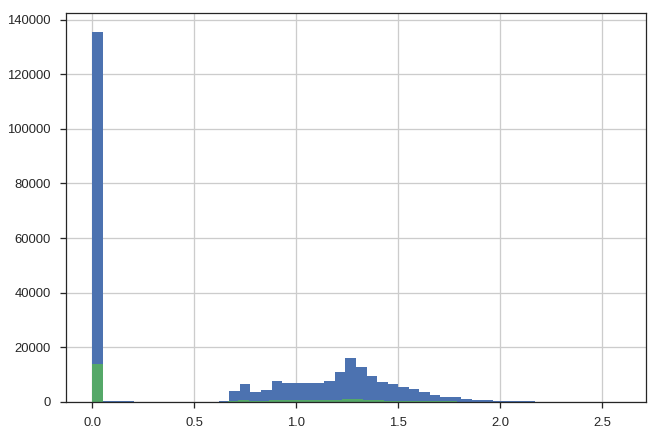

In [26]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=50)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=50);

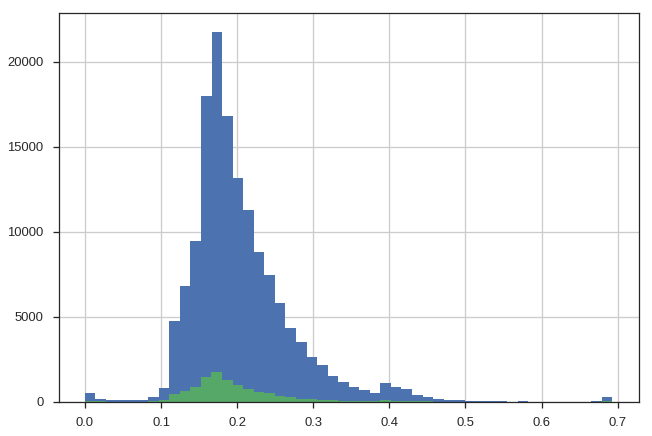

In [28]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=50)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=50);

In [32]:
%%time

res = app_train.loc[:, ['APARTMENTS_MODE',
                'BASEMENTAREA_MODE',
                'YEARS_BEGINEXPLUATATION_MODE',
                'YEARS_BUILD_MODE',
                'COMMONAREA_MODE',
                'ELEVATORS_MODE',
                'ENTRANCES_MODE',
                'FLOORSMAX_MODE',
                'FLOORSMIN_MODE',
                'LANDAREA_MODE',
                'LIVINGAPARTMENTS_MODE',
                'LIVINGAREA_MODE',
                'NONLIVINGAPARTMENTS_MODE',
                'NONLIVINGAREA_MODE',
                'TOTALAREA_MODE'
                 ]].apply(np.mean, axis=1)

CPU times: user 1min 13s, sys: 82.3 ms, total: 1min 13s
Wall time: 1min 14s


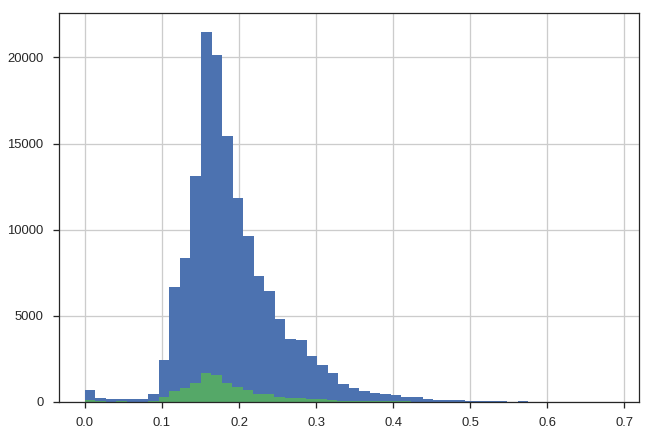

In [33]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=50)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=50);

In [35]:
%%time

# information about client's surroundings
res = app_train.loc[:, ['OBS_30_CNT_SOCIAL_CIRCLE',
                        'DEF_30_CNT_SOCIAL_CIRCLE',
                        'OBS_60_CNT_SOCIAL_CIRCLE',
                        'DEF_60_CNT_SOCIAL_CIRCLE'
                ]].apply(np.mean, axis=1)

CPU times: user 1min 2s, sys: 166 ms, total: 1min 2s
Wall time: 1min 3s


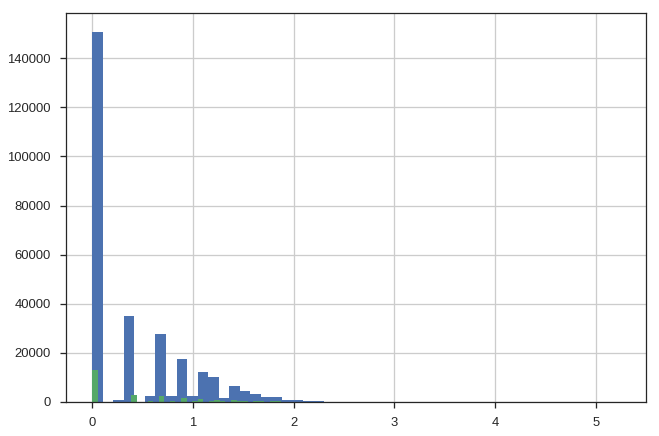

In [41]:
res[(app_train.TARGET == 0)].map(np.log1p).hist(bins=50)
res[(app_train.TARGET == 1)].map(np.log1p).hist(bins=50);

In [43]:
%%time

# information about client's surroundings
res = app_train.loc[:, ['APARTMENTS_MEDI',
                        'BASEMENTAREA_MEDI',
                        'YEARS_BEGINEXPLUATATION_MEDI',
                        'YEARS_BUILD_MEDI',
                        'COMMONAREA_MEDI',
                        'ELEVATORS_MEDI',
                        'ENTRANCES_MEDI',
                        'FLOORSMAX_MEDI',
                        'FLOORSMIN_MEDI',
                        'LANDAREA_MEDI',
                        'LIVINGAPARTMENTS_MEDI',
                        'LIVINGAREA_MEDI',
                        'NONLIVINGAPARTMENTS_MEDI',
                        'NONLIVINGAREA_MEDI'
                ]].apply(np.mean, axis=1)

CPU times: user 40.1 s, sys: 186 ms, total: 40.3 s
Wall time: 40.2 s


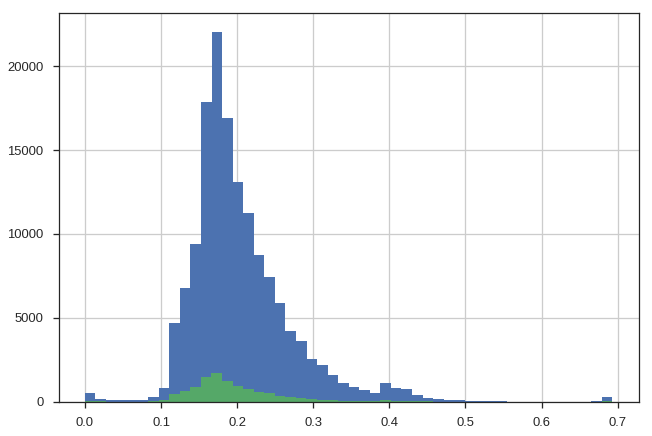

In [44]:
res[(app_train.TARGET == 0)].map(np.log1p).hist(bins=50)
res[(app_train.TARGET == 1)].map(np.log1p).hist(bins=50);

In [46]:
%%time

res = app_train.loc[:, ['DAYS_REGISTRATION',
                  'DAYS_ID_PUBLISH',
                  'DAYS_LAST_PHONE_CHANGE'
                 ]].apply(np.mean, axis=1)

CPU times: user 18.4 s, sys: 181 ms, total: 18.6 s
Wall time: 18.4 s


In [47]:
%%time

res = app_train.loc[:, ['AMT_REQ_CREDIT_BUREAU_HOUR',
                        'AMT_REQ_CREDIT_BUREAU_DAY',
                        'AMT_REQ_CREDIT_BUREAU_WEEK',
                        'AMT_REQ_CREDIT_BUREAU_MON',
                        'AMT_REQ_CREDIT_BUREAU_QRT',
                        'AMT_REQ_CREDIT_BUREAU_YEAR'
                        ]].apply(np.mean, axis=1)

CPU times: user 34.6 s, sys: 672 ms, total: 35.3 s
Wall time: 34.5 s


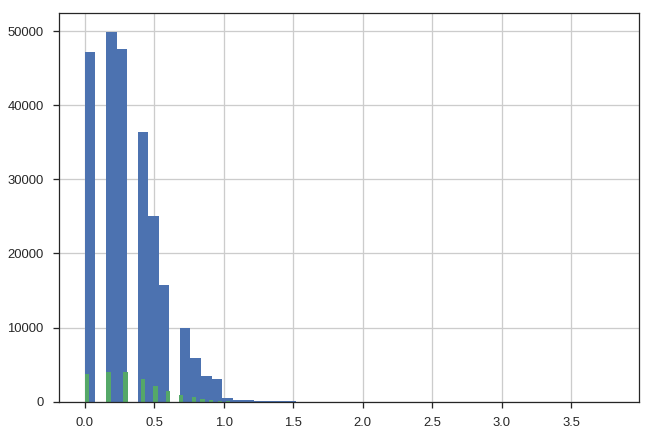

In [52]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=50)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=50);

** Relationship between DAYS_CREDIT_ENDDATE and DAYS_ENDDATE_FACT ( only for closed credits ) .**

In [56]:
bureau.loc[:, ['SK_ID_CURR', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CREDIT_ACTIVE']].head()

,SK_ID_CURR,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CREDIT_ACTIVE
0,215354,-153.0,-153.0,Closed
1,215354,1075.0,NaN,Active
2,215354,528.0,NaN,Active
3,215354,NaN,NaN,Active
4,215354,1197.0,NaN,Active


In [4]:
bureau.loc[bureau.CREDIT_ACTIVE == 'Closed', ['SK_ID_CURR', 'DAYS_CREDIT_ENDDATE', 'DAYS_ENDDATE_FACT', 'CREDIT_ACTIVE']].head()

,SK_ID_CURR,DAYS_CREDIT_ENDDATE,DAYS_ENDDATE_FACT,CREDIT_ACTIVE
0,215354,-153.0,-153.0,Closed
7,162297,-1684.0,-1710.0,Closed
8,162297,-811.0,-840.0,Closed
11,162297,-629.0,-825.0,Closed
14,238881,-187.0,-187.0,Closed


In [228]:
res = bureau.loc[bureau.CREDIT_ACTIVE == 'Closed', ['SK_ID_CURR', 'DAYS_ENDDATE_FACT']]
res = res.groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].max() # most recently ended credit for a client

tmp   = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', ['SK_ID_CURR', 'DAYS_CREDIT_ENDDATE']]
tmp   = bureau.groupby('SK_ID_CURR')['DAYS_CREDIT_ENDDATE'].max() # credit to be expired soon

res  = tmp.add(-res, fill_value=np.nan).astype(np.float32)
res   = app_train.SK_ID_CURR.map(res)

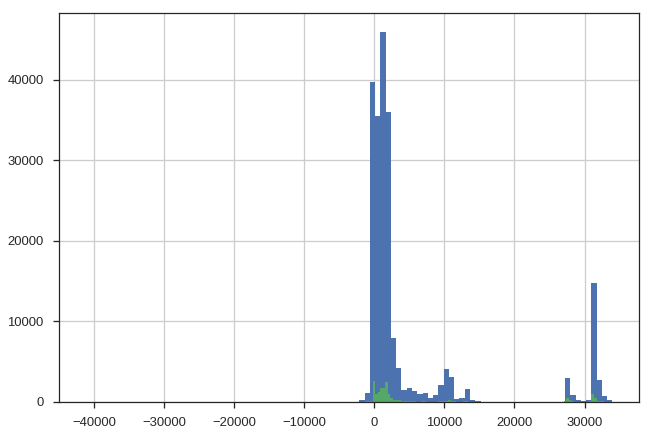

In [230]:
res[app_train.TARGET == 0].hist(bins=100)
res[app_train.TARGET == 1].hist(bins=100);

In [226]:
res = bureau.loc[bureau.CREDIT_ACTIVE == 'Closed', ['SK_ID_CURR', 'DAYS_ENDDATE_FACT']]
res = res.groupby('SK_ID_CURR')['DAYS_ENDDATE_FACT'].max() # most recently ended credit for a client

tmp = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', ['SK_ID_CURR', 'DAYS_CREDIT']]
tmp = tmp.groupby('SK_ID_CURR')['DAYS_CREDIT'].max() # most recently applied credit at Home credit

res   = tmp.add(-res, fill_value=np.nan).astype(np.float32)
res   = app_train.SK_ID_CURR.map(res)

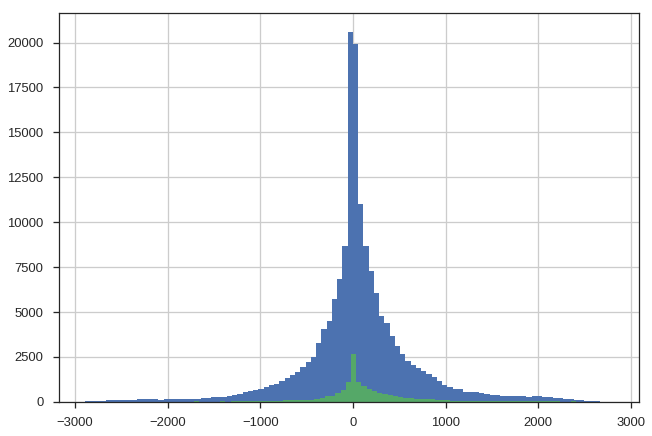

In [227]:
res[app_train.TARGET == 0].hist(bins=100)
res[app_train.TARGET == 1].hist(bins=100);

In [59]:
res = bureau.loc[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0), ['SK_ID_CURR', 'CREDIT_ACTIVE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM']]
total_sum   = res.groupby(res.SK_ID_CURR)['AMT_CREDIT_SUM'].mean().astype(np.float32)
total_debit = res.groupby(res.SK_ID_CURR)['AMT_CREDIT_SUM_DEBT'].mean().astype(np.float32)


tmp = total_debit.div(total_sum, fill_value=np.nan).replace([np.inf, -np.inf], np.nan).astype(np.float32)
tmp = app_train.SK_ID_CURR.map(tmp)

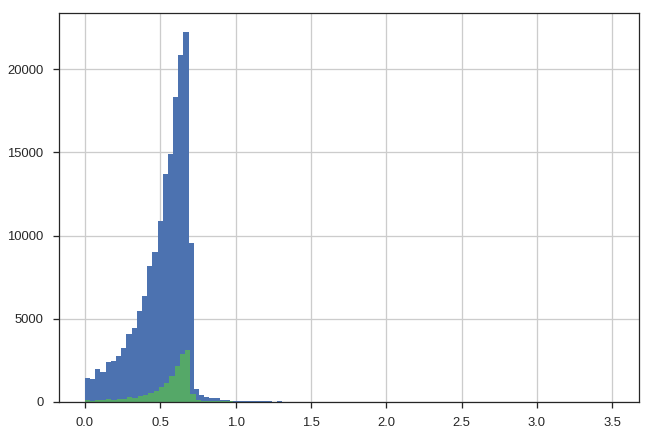

In [60]:
tmp[(app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
tmp[(app_train.TARGET == 1)].map(np.log1p).hist(bins=100);

In [70]:
# active loans
res      = bureau.loc[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE > 0), ['SK_ID_CURR', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE']]
duration = (res.DAYS_CREDIT_ENDDATE - res.DAYS_CREDIT).astype(np.float32)

duration = duration.groupby(res.SK_ID_CURR).mean()
duration = app_train.SK_ID_CURR.map(duration)

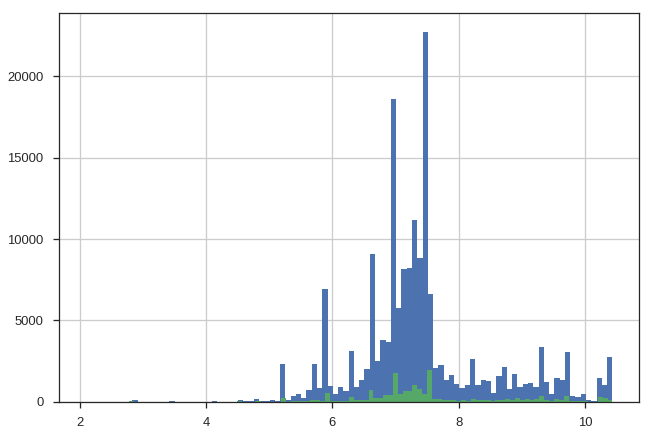

In [74]:
duration[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
duration[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

In [101]:
# active loans
res = bureau.loc[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.DAYS_CREDIT_ENDDATE > 0), ['SK_ID_CURR', 'DAYS_CREDIT', 'DAYS_CREDIT_ENDDATE']]
d1  = (res.DAYS_CREDIT_ENDDATE - res.DAYS_CREDIT).astype(np.float32)

d1  = d1.groupby(res.SK_ID_CURR).mean().astype(np.float32)
d1  = app_train.SK_ID_CURR.map(d1).astype(np.float32)

In [102]:
# closed loans
res  = bureau.loc[(bureau.CREDIT_ACTIVE == 'Closed') & (bureau.DAYS_CREDIT_ENDDATE < 0), ['SK_ID_CURR', 'DAYS_CREDIT', 'DAYS_ENDDATE_FACT']]
d2   = -(res.DAYS_CREDIT - res.DAYS_ENDDATE_FACT).astype(np.float32)

d2   = d2.groupby(res.SK_ID_CURR).mean().astype(np.float32)
d2   = app_train.SK_ID_CURR.map(d2).astype(np.float32)

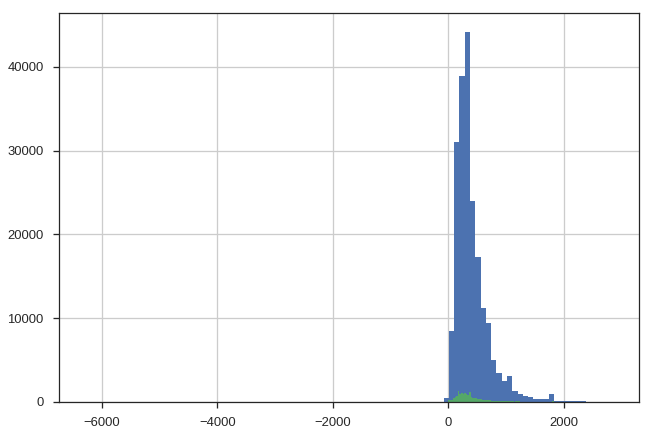

In [106]:
d2[app_train.TARGET == 0].hist(bins=100)
d2[app_train.TARGET == 1].hist(bins=100);

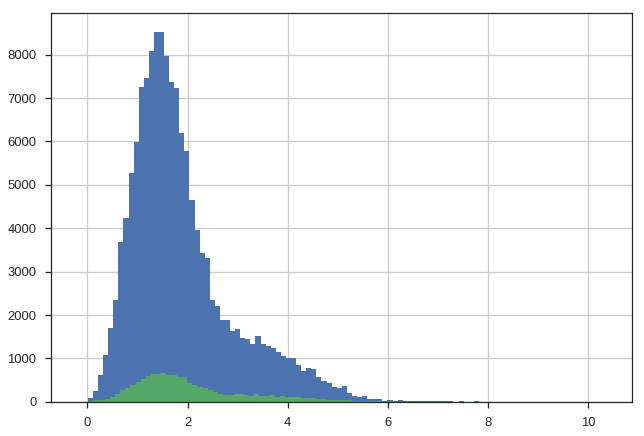

In [103]:
((d1 / d2).replace([np.inf, -np.inf], np.nan))[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
((d1 / d2).replace([np.inf, -np.inf], np.nan))[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

In [113]:
res = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', ['SK_ID_CURR', 'DAYS_CREDIT', 'DAYS_CREDIT_UPDATE']]
res = -res.groupby(res.SK_ID_CURR)['DAYS_CREDIT_UPDATE'].mean()

res = app_train.SK_ID_CURR.map(res)

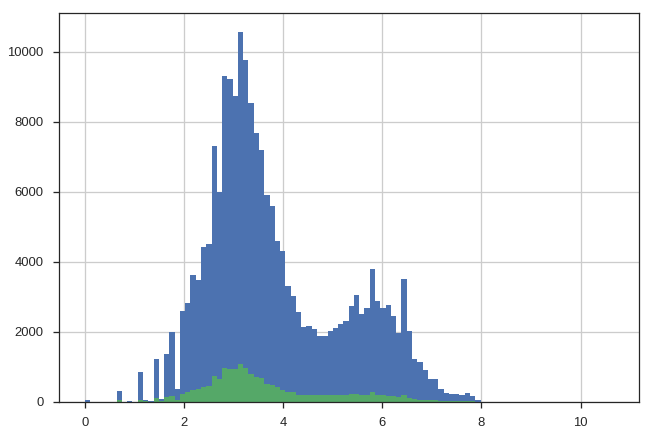

In [118]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

In [132]:
tmp = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', :]
res = tmp.DAYS_CREDIT_ENDDATE.isnull()
res = res.groupby(tmp.SK_ID_CURR).sum()

res = app_train.SK_ID_CURR.map(res)

In [137]:
ss = pd.crosstab(res, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)
     
del ss
gc.collect()

TARGET         0.0    1.0     ratio
SK_ID_CURR                         
0.0         153167  12298  0.074324
1.0          38642   4375  0.101704
2.0           6358    864  0.119634
3.0           1037    172  0.142266
4.0            166     30  0.153061
5.0             27      7  0.205882
6.0              4      1  0.200000
9.0              2      0  0.000000


35326

In [140]:
ss = app_train.HOUR_APPR_PROCESS_START.astype(np.str) + '_' + app_train.WEEKDAY_APPR_PROCESS_START.astype(np.str)

ss = pd.crosstab(ss, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect();

TARGET         0.0  1.0     ratio
row_0                            
0_FRIDAY        10    0  0.000000
0_MONDAY         6    1  0.142857
0_SATURDAY       2    0  0.000000
0_SUNDAY         4    1  0.200000
0_THURSDAY       6    1  0.142857
0_TUESDAY        2    2  0.500000
0_WEDNESDAY      4    1  0.200000
10_FRIDAY     5461  466  0.078623
10_MONDAY     5333  482  0.082889
10_SATURDAY   4747  363  0.071037
10_SUNDAY     2131  172  0.074685
10_THURSDAY   5519  482  0.080320
10_TUESDAY    5829  522  0.082192
10_WEDNESDAY  5676  539  0.086726
11_FRIDAY     5320  499  0.085754
11_MONDAY     5522  479  0.079820
11_SATURDAY   4477  345  0.071547
11_SUNDAY     2135  180  0.077754
11_THURSDAY   5495  517  0.085995
11_TUESDAY    5780  524  0.083122
11_WEDNESDAY  5494  462  0.077569
12_FRIDAY     5005  441  0.080977
12_MONDAY     5027  445  0.081323
12_SATURDAY   3993  333  0.076976
12_SUNDAY     1981  153  0.071696
12_THURSDAY   4937  463  0.085741
12_TUESDAY    5378  546  0.092167
12_WEDNESDAY  

In [143]:
res = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', :].groupby('SK_ID_CURR')['CREDIT_TYPE'].nunique()
res = app_train.SK_ID_CURR.map(res)

ss  = pd.crosstab(res, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])

print(ss)

del ss
gc.collect();

TARGET         0.0   1.0     ratio
SK_ID_CURR                        
1.0         102096  8077  0.073312
2.0          90448  8903  0.089612
3.0           6683   736  0.099205
4.0            172    30  0.148515
5.0              4     1  0.200000


In [147]:
tmp = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', ['SK_ID_CURR', 'AMT_CREDIT_SUM_LIMIT']]
res = tmp.AMT_CREDIT_SUM_LIMIT.isnull()
res = res.groupby(tmp.SK_ID_CURR).sum()

ss  = pd.crosstab(res, app_train.TARGET)
ss.loc[:, 'ratio'] = ss[1] / (ss[0] + ss[1])
print(ss)

del ss
gc.collect()

TARGET                  0.0   1.0     ratio
AMT_CREDIT_SUM_LIMIT                       
0.0                   74798  6697  0.082177
1.0                   37833  3334  0.080987
2.0                   14671  1186  0.074793
3.0                    5058   437  0.079527
4.0                    1657   140  0.077908
5.0                     464    54  0.104247
6.0                     162    17  0.094972
7.0                      51     4  0.072727
8.0                      17     1  0.055556
9.0                       7     2  0.222222
10.0                      3     0  0.000000
11.0                      1     0  0.000000
12.0                      2     0  0.000000
15.0                      1     0  0.000000


327

In [175]:
res = bureau.loc[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_ANNUITY.notnull()), ['SK_ID_CURR', 'AMT_ANNUITY']]
res = res.groupby('SK_ID_CURR')['AMT_ANNUITY'].sum().astype(np.float32)
r1  = app_train.SK_ID_CURR.map(res)

In [176]:
res = bureau.loc[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM.notnull()), ['SK_ID_CURR', 'AMT_CREDIT_SUM']]
res = res.groupby('SK_ID_CURR')['AMT_CREDIT_SUM'].sum().astype(np.float32)
r2  = app_train.SK_ID_CURR.map(res)

In [181]:
tmp = r1.div(r2, fill_value=np.nan).replace([np.inf, -np.inf], np.nan)

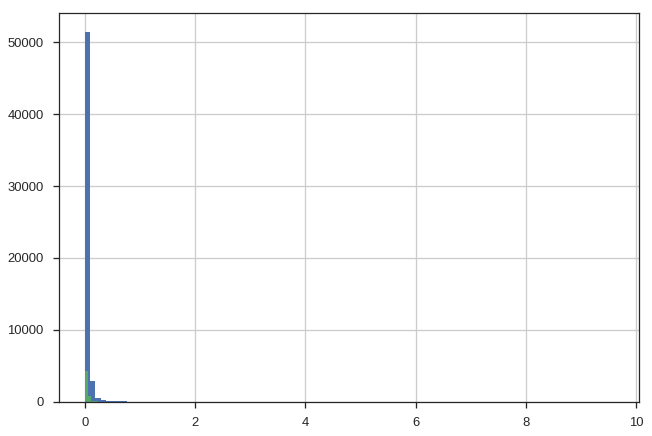

In [186]:
tmp[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
tmp[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

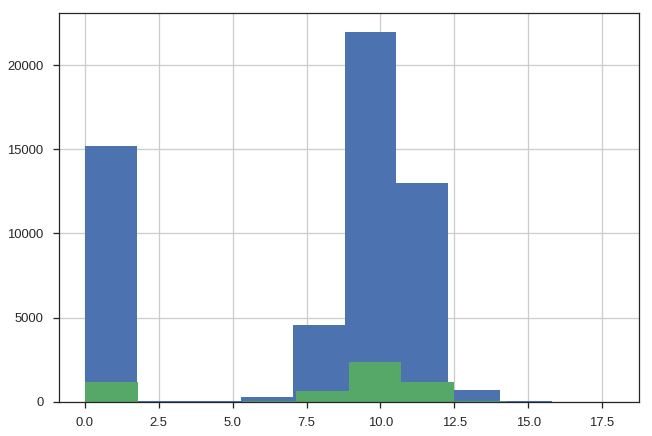

In [166]:
res[app_train.TARGET == 0].map(np.log1p).hist()
res[app_train.TARGET == 1].map(np.log1p).hist();

In [31]:
prev_app.NAME_CONTRACT_STATUS.value_counts()

Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: NAME_CONTRACT_STATUS, dtype: int64

In [32]:
prev_app.NAME_CONTRACT_STATUS.cat.codes.value_counts()

0    1036781
1     316319
2     290678
3      26436
dtype: int64

In [4]:
zz = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'SK_ID_PREV']]
zz = zz.merge(installments.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'NUM_INSTALMENT_NUMBER', 'AMT_PAYMENT']], how='left')

In [15]:
ss = app_train.set_index('SK_ID_CURR')['AMT_INCOME_TOTAL']

In [29]:
res = zz.div(ss, fill_value=np.nan)
res = res.reset_index()
res = res.groupby('SK_ID_CURR')[0].max()

res = app_train.SK_ID_CURR.map(res)

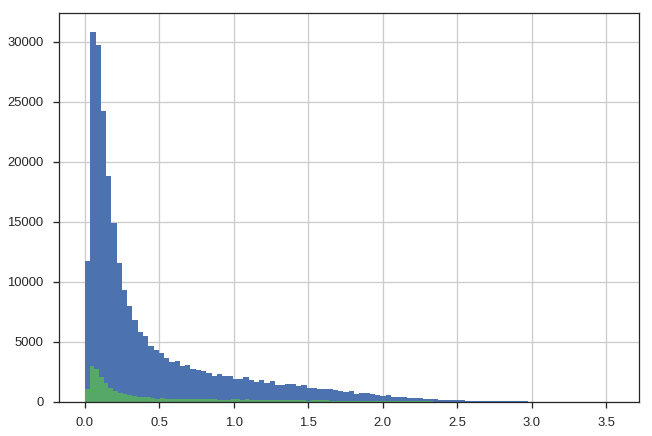

In [30]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

In [4]:
zz = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'SK_ID_PREV']]
zz = zz.merge(installments.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'DAYS_INSTALMENT', 'DAYS_ENTRY_PAYMENT']], how='left')

In [19]:
res = (zz.DAYS_INSTALMENT - zz.DAYS_ENTRY_PAYMENT)
res = res.groupby(zz.SK_ID_CURR).sum()
res = app_train.SK_ID_CURR.map(res).replace([np.inf, -np.inf], np.nan)

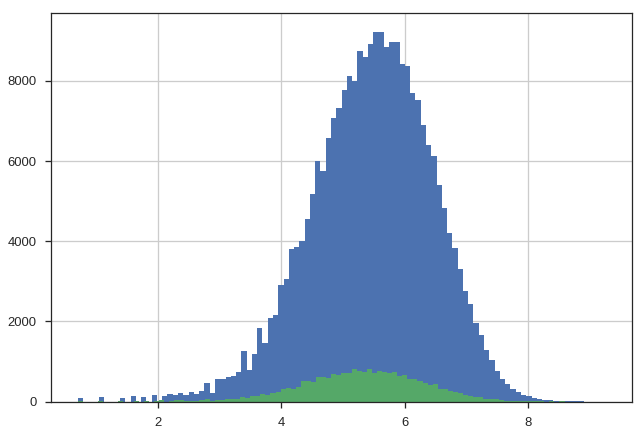

In [26]:
res[(res > 0) & (app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
res[(res > 0) & (app_train.TARGET == 1)].map(np.log1p).hist(bins=100);

In [28]:
res[res < 0].shape[0]

6807

In [30]:
res[res > 0].shape[0]

282091

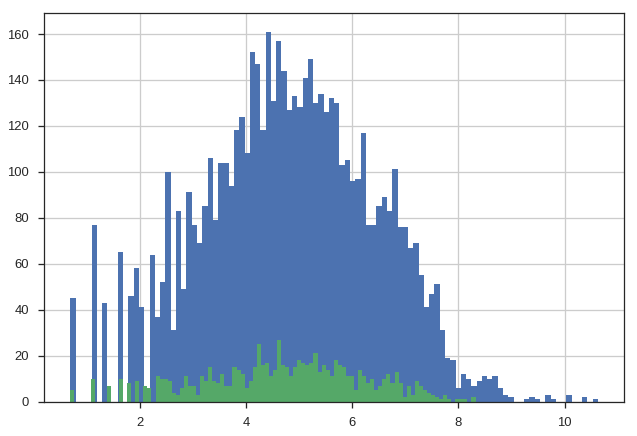

In [27]:
(-res[(res < 0) & (app_train.TARGET == 0)]).map(np.log1p).hist(bins=100)
(-res[(res < 0) & (app_train.TARGET == 1)]).map(np.log1p).hist(bins=100);

In [14]:
res = bureau.loc[(bureau.CREDIT_ACTIVE == 'Active') & (bureau.AMT_CREDIT_SUM_DEBT > 0), ['SK_ID_CURR', 'CREDIT_ACTIVE', 'AMT_CREDIT_SUM_DEBT', 'AMT_CREDIT_SUM']]
total_debt = res.groupby(res.SK_ID_CURR)['AMT_CREDIT_SUM_DEBT'].sum().astype(np.float32)

res = app_train.SK_ID_CURR.map(total_debt)
res = (res / app_train.AMT_INCOME_TOTAL).replace([np.inf, -np.inf], np.nan)

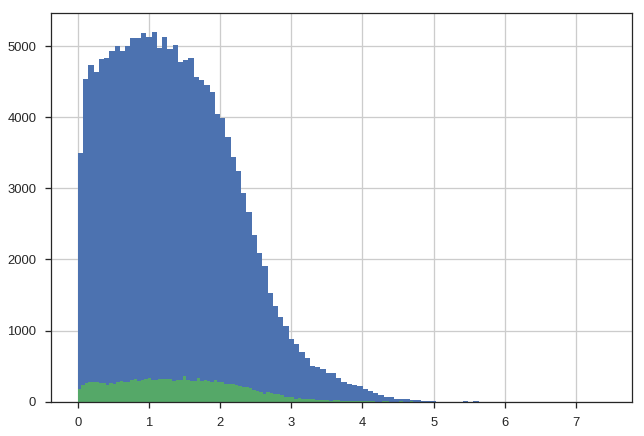

In [15]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=100);

In [5]:
zz = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'SK_ID_PREV']]
zz = zz.merge(installments.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'AMT_INSTALMENT', 'AMT_PAYMENT']], how='left')

In [12]:
res = (zz.AMT_INSTALMENT - zz.AMT_PAYMENT)
res = res.groupby(zz.SK_ID_CURR).std()
res = app_train.SK_ID_CURR.map(res).replace([np.inf, -np.inf], np.nan)

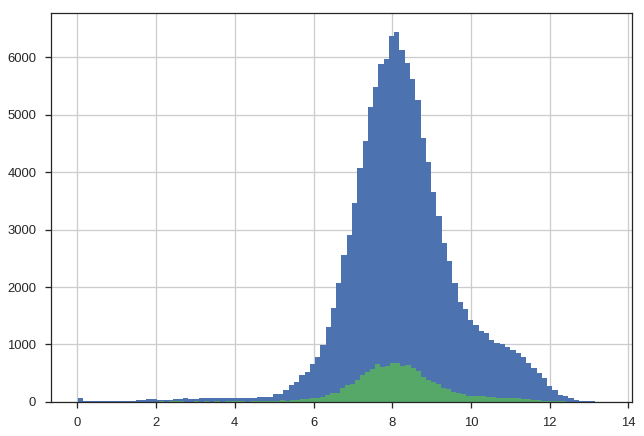

In [14]:
res[(res > 0) & (app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
res[(res > 0) & (app_train.TARGET == 1)].map(np.log1p).hist(bins=100);

In [15]:
res = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'SK_ID_PREV', 
                                                           'AMT_DOWN_PAYMENT', 
                                                           'RATE_DOWN_PAYMENT',
                                                           'CNT_PAYMENT'
                                                          ]]

tmp = res.AMT_DOWN_PAYMENT * res.RATE_DOWN_PAYMENT * res.CNT_PAYMENT
tmp = tmp.groupby(res.SK_ID_CURR).sum()
tmp = app_train.SK_ID_CURR.map(tmp)

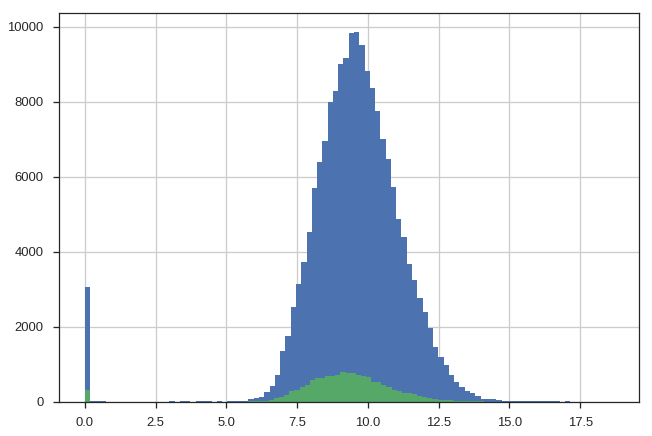

In [21]:
tmp[(tmp > 0 ) & (app_train.TARGET == 0)].map(np.log1p).hist(bins=100)
tmp[(tmp > 0) & (app_train.TARGET == 1)].map(np.log1p).hist(bins=100);

In [57]:
res = bureau.loc[bureau.CREDIT_ACTIVE == 'Active', ['SK_ID_CURR', 'AMT_ANNUITY']]
res = res.groupby(res.SK_ID_CURR)['AMT_ANNUITY'].sum().map(lambda x: np.log(x + 1))
res = app_train.SK_ID_CURR.map(res)
res = res.div(app_train.AMT_CREDIT.map(lambda x: np.log(x + 1)), fill_value=np.nan)

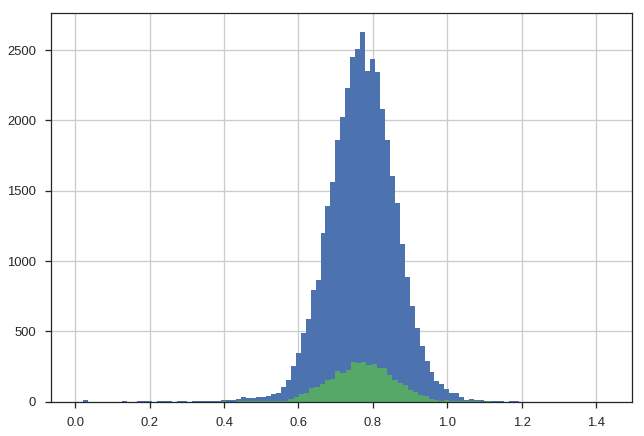

In [58]:
res[(res > 0) & (app_train.TARGET == 0)].hist(bins=100)
res[(res > 0) & (app_train.TARGET == 1)].hist(bins=100);

In [4]:
zz = prev_app.loc[prev_app.NAME_CONTRACT_STATUS == 'Approved', ['SK_ID_CURR', 'SK_ID_PREV']]
zz = zz.merge(pos_cash.loc[:, ['SK_ID_CURR', 'SK_ID_PREV', 'CNT_INSTALMENT', 'CNT_INSTALMENT_FUTURE']], how='left')

In [7]:
res = zz.groupby('SK_ID_CURR')['CNT_INSTALMENT_FUTURE'].sum()
res = app_train.SK_ID_CURR.map(res)

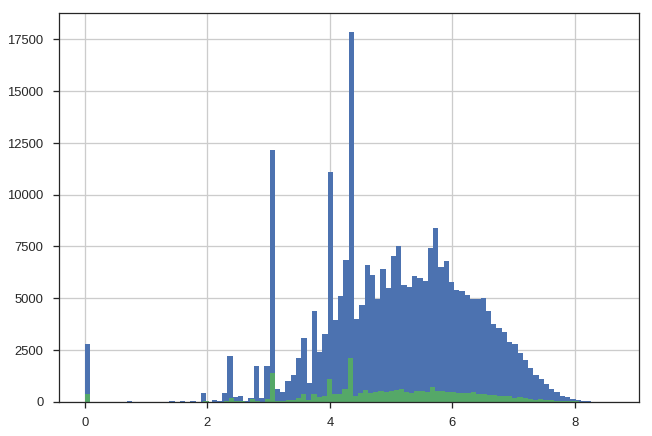

In [12]:
res[app_train.TARGET == 0].map(np.log1p).hist(bins=100)
res[app_train.TARGET == 1].map(np.log1p).hist(bins=100);